In [1]:
import sys
import heapq

In [2]:
class Edge(object):
    def __init__(self, weight, startVertex, targetVertex):
        self.weight = weight;
        self.startVertex = startVertex;
        self.targetVertex = targetVertex;

In [3]:
class Node(object):
    def __init__(self, name):
        self.name = name;
        self. visited = False;
        self. predecessor = None; #how we will be able to track the shortest path
        self.adjacencylist = [];
        self.minDistance = sys.maxsize;
    def __cm__(self, otherVertex):
        return self.cmp(self.minDistance, otherVertex.minDistance);
    def __lt__(self, other):
        self.Priority = self.minDistance;
        otherPriority = other.minDistance;
        return self.Priority < otherPriority;

In [4]:
class Algorithm():
    def calculateShortestPath(self, vertexList, startVertex):
        q = [];
        
        startVertex.minDistance = 0;
        heapq.heappush(q, startVertex);
        
        while q:
            
            actualVertex = heapq.heappop(q);
            
            for edge in actualVertex.adjacencylist:
                u = edge.startVertex;
                v = edge.targetVertex;
                newDistance = u.minDistance + edge.weight;
                
                if newDistance < v.minDistance:
                    v.predecessor = u;
                    v.minDistance = newDistance;
                    heapq.heappush(q, v);
    def getShortestPathTo(self, targetVertex):
        print("Shortest path to vertex is: ", targetVertex.minDistance);
        node = targetVertex;
        while node is not None:
            print("%s " % node.name);
            node = node.predecessor;

In [6]:
node1 = Node("A");
node2 = Node("B");
node3 = Node("C");
node4 = Node("D");
node5 = Node("E");
node6 = Node("F");
node7 = Node("G");
node8 = Node("H");

edge1 = Edge(5,node1,node2);
edge2 = Edge(8,node1,node8);
edge3 = Edge(9,node1,node5);
edge4 = Edge(15,node2,node4);
edge5 = Edge(12,node2,node3);
edge6 = Edge(4,node2,node8);
edge7 = Edge(7,node8,node3);
edge8 = Edge(6,node8,node6);
edge9 = Edge(5,node5,node8);
edge10 = Edge(4,node5,node6);
edge11 = Edge(20,node5,node7);
edge12 = Edge(1, node6,node3);
edge13 = Edge(13,node6,node7);
edge14 = Edge(3,node3,node4);
edge15 = Edge(11,node3,node7);
edge16 = Edge(9, node4,node7);

In [7]:
node1.adjacencylist.append(edge1);
node1.adjacencylist.append(edge2);
node1.adjacencylist.append(edge3);
node2.adjacencylist.append(edge4);
node2.adjacencylist.append(edge5);
node2.adjacencylist.append(edge6);
node8.adjacencylist.append(edge7);
node8.adjacencylist.append(edge8);
node5.adjacencylist.append(edge9);
node5.adjacencylist.append(edge10);
node5.adjacencylist.append(edge11);
node6.adjacencylist.append(edge12);
node6.adjacencylist.append(edge13);
node3.adjacencylist.append(edge14);
node3.adjacencylist.append(edge15);
node4.adjacencylist.append(edge16);

In [8]:
vertexList = (node1 ,node2, node3, node4, node5, node6, node7, node8);
algorithm = Algorithm();
algorithm.calculateShortestPath(vertexList, node1);
algorithm.getShortestPathTo(node4);

Shortest path to vertex is:  17
D 
C 
F 
E 
A 


### Next line is implementation of Bellman Ford algorithm, worst time complexity O(V*E), average O(V*E), best case O(E)

In [9]:
class Graph:


    # default constructor for graph
    def __init__(self, vertices): # graph get only one parametr - it is number of vertices
        
        self.M = vertices   # Total number of vertices in the graph

        self.graph = []     # array graph

        self.res = [] # array res, which will help to find shortest path

    #function to add edges, a is first edge, b is second edge, c is weight

    def appendEdge(self, a, b, c):

        self.graph.append([a, b, c])



    # find the vertex that we need in array of vertices
    def findResult(self, distance, dest):


        for k in range(self.M): # for loop will be iterate N times, where N is number of vertex
            self.res.append([k, distance[k]]) # appending to array vertex and  weight to go to it
        for i in range(len(self.res)): # loop to find  weight
            if self.res[i][0] == dest: # in case if destination point equals to array element print this element
                print(f'Shortest path to point {dest} is {self.res[i][1]}') # printing result
    
    # function to calculate shortest path
    def bellman_ford(self, src, dest): # gets 2 parametres, origin point and destination point
        distance = [float("Inf")] * self.M # create array with size of number of vertices, full of Infinties
        distance[src] = 0 # distance to origin point is zero by default

        for i in range(self.M - 1): # cycle will be iterating V-1 times, where V is number of vertices

            for a, b, c in self.graph: # iterating through every edge

                if distance[a] != float("Inf") and distance[a] + c < distance[b]:

                    distance[b] = distance[a] + c # incresing distance weight


        #checking graph for negative weight cycle, because bellman algoruthm cannot handle it
        for a, b, c in self.graph:

            if distance[a] != float("Inf") and distance[a] + c < distance[b]:

                print("Graph contains negative weight cycle")

                return # going out of loop
        self.findResult(distance, dest) # print result

# creating graph object
g = Graph(5)

g.appendEdge(0, 1, 5) # appending edge
g.appendEdge(0, 2, 4) # appending edge 
g.appendEdge(1, 3, 3)# appending edge
g.appendEdge(1, 2, 6)# appending edge
g.appendEdge(2, 3, 2)# appending edge
g.appendEdge(3, 4, 3)# appending edge
g.bellman_ford(0, 4)# finding shortest path

Shortest path to point 4 is 9


#### We see that Dijkstra algorith uses heaps to implement algorithm, and Bellman algorithm uses arrays, but Dijkstra algorithms cannot handle negative weights, abd Bellman can. That is one of advantage of Bellman algorithm. Both algoritms can find shortest path in directed graphs. But Dijkstra have much more better time complexity

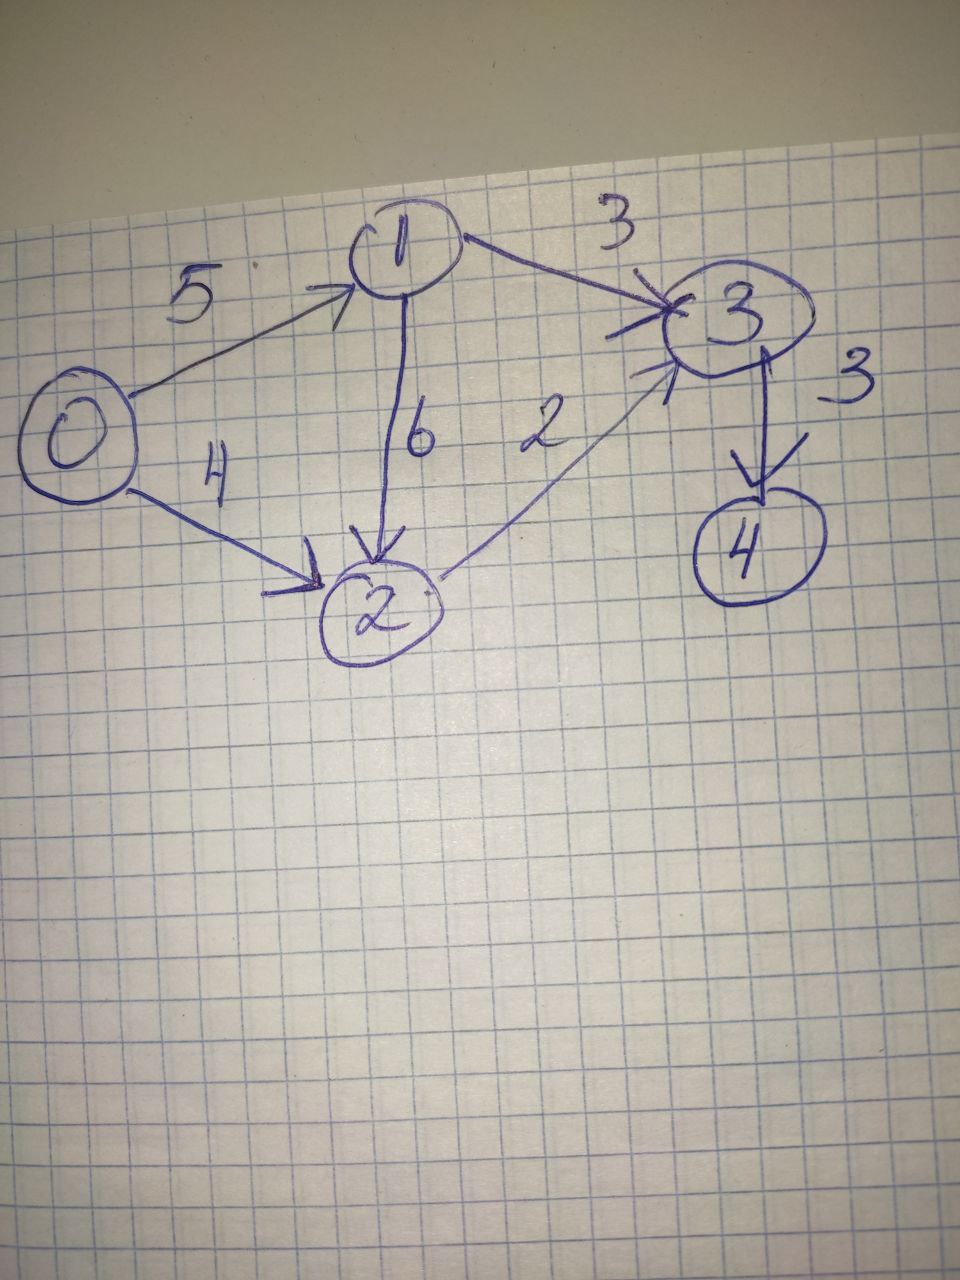